## 01. Import Libraries & data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#Import Data
path = r'C:\Users\Dell\\Documents\Instacart Basket Analysis'

In [3]:
# Import orders_products_all dataframe.
df_ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

## 02. create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart

<Axes: xlabel='orders_day_of_week'>

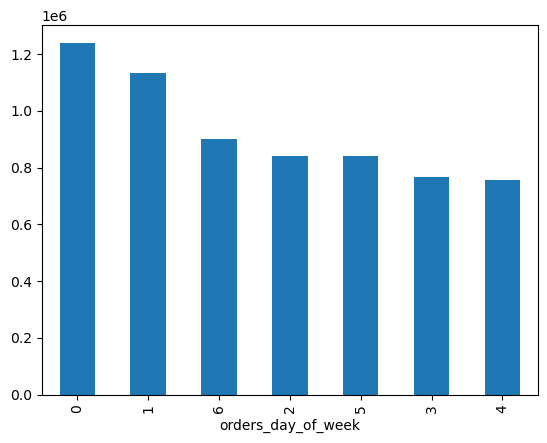

In [4]:
# Creating bar charts
df_ords_prods_all['orders_day_of_week'].value_counts().plot.bar()

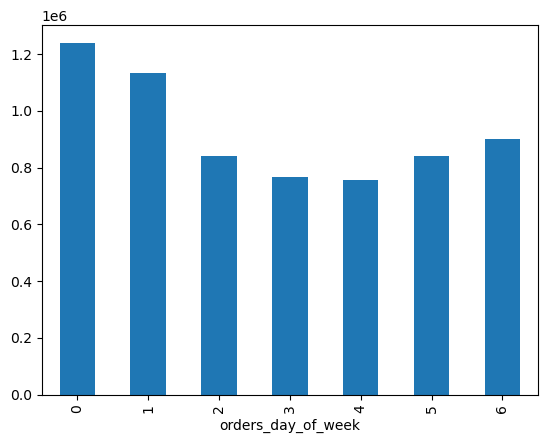

In [5]:
# Sort by index - days of the week in order
Bar = df_ords_prods_all['orders_day_of_week'].value_counts().sort_index().plot.bar()

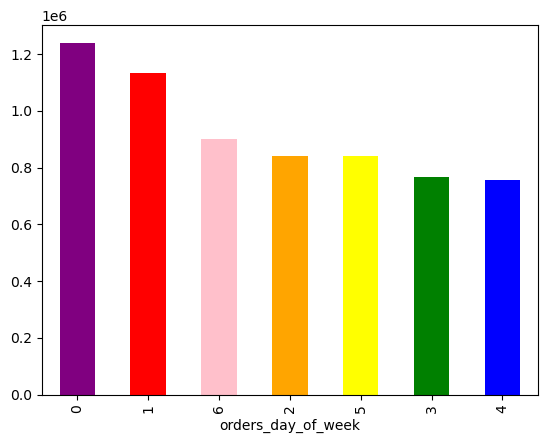

In [6]:
# Adding color to the bars.
bar = df_ords_prods_all['orders_day_of_week'].value_counts().plot.bar(color=['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [7]:
# Exporting bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))


<Axes: ylabel='Frequency'>

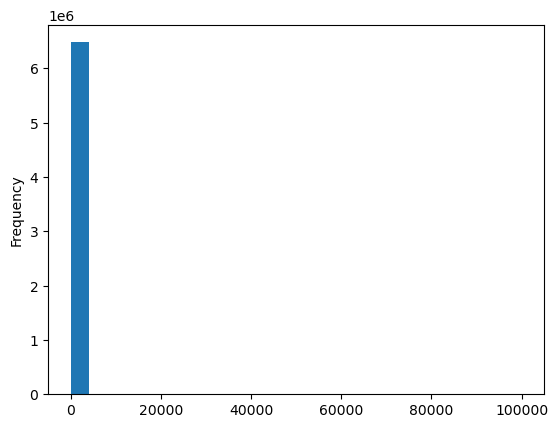

In [8]:
# Creating Histograms & Scatter plot
df_ords_prods_all['prices'].plot.hist(bins=25)

#### Here we got only a single column

In [9]:
# Investigating the 'prices' column
df_ords_prods_all['prices'].mean()

12.064084903513482

In [10]:
df_ords_prods_all['prices'].median()

7.4

In [11]:
df_ords_prods_all['prices'].max()

99999.0

#### The max. of prices column is an odd number.

<Axes: xlabel='prices', ylabel='prices'>

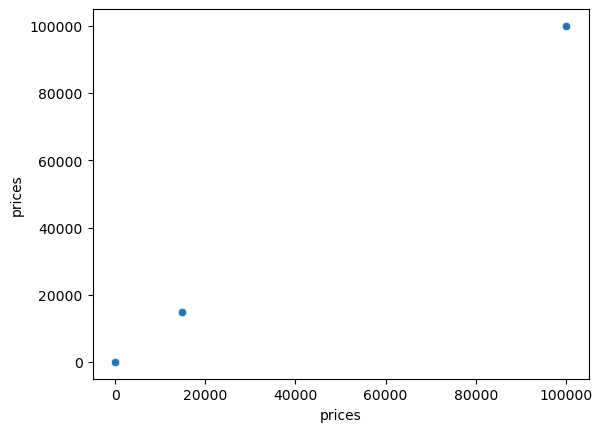

In [12]:
# Creating Scatter plot
sns.scatterplot(x = 'prices', y = 'prices',data = df_ords_prods_all)

In [13]:
#### Finding whether there is a value above certain threshold.
df_ords_prods_all.loc[df_ords_prods_all['prices'] > 100]

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,order_frequency,first_name,surname,Gender,State,Age,date_joined,dependants,family_status,income
4686,33664,2 % Reduced Fat Milk,84,16,99999.0,548384,89592,33,5,17,...,Frequent customer,Katherine,Abbott,Female,Minnesota,22,1/12/2017,0,single,317122
16696,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,1955425,201725,24,2,9,...,Frequent customer,Jack,Bryan,Male,Maine,52,1/12/2020,2,married,221333
16697,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,21260,201725,45,4,8,...,Frequent customer,Jack,Bryan,Male,Maine,52,1/12/2020,2,married,221333
18710,33664,2 % Reduced Fat Milk,84,16,99999.0,1538900,125431,2,5,9,...,Frequent customer,John,Sullivan,Male,Nebraska,35,7/12/2019,0,single,98636
18711,33664,2 % Reduced Fat Milk,84,16,99999.0,1268312,125431,9,1,11,...,Frequent customer,John,Sullivan,Male,Nebraska,35,7/12/2019,0,single,98636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6440799,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,427256,156508,1,0,13,...,Non-frequent customer,Sarah,Lu,Female,Rhode Island,18,11/7/2018,1,living with parents and siblings,257430
6448413,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,2500878,200128,4,3,10,...,Regular customer,Carl,Weber,Male,Arkansas,33,5/22/2018,0,single,139311
6452760,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,3134495,5359,3,6,19,...,Regular customer,Denise,Morris,Female,Arkansas,65,2/7/2019,1,married,234467
6452764,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,960948,176856,6,1,12,...,Frequent customer,Michael,Weeks,Male,Pennsylvania,60,2/19/2019,0,divorced/widowed,209333


In [14]:
#### There are a total of 5127 rows with outlier observations.

In [15]:
#### Dealing with outliers.
df_ords_prods_all.loc[df_ords_prods_all['prices'] >100, 'prices'] = np.nan

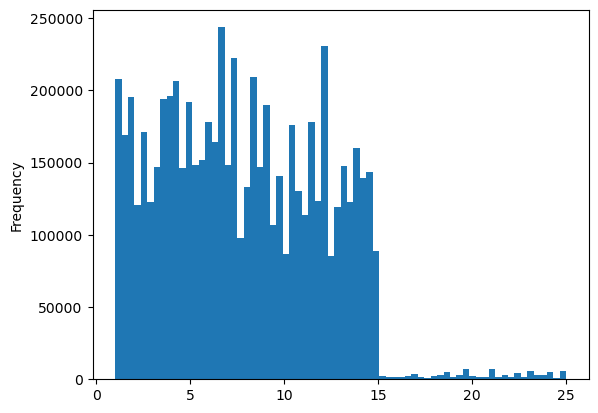

In [16]:
# Creating histogram
hist = df_ords_prods_all['prices'].plot.hist(bins=70)

In [17]:
# Export the histogram.
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_prices.png'))

In [18]:
# Creating Line chart
# Create the seed.
np.random.seed(4)

In [19]:
# Create a list holding True/False values to test the np.random.rand () <= 0.7
dev = np.random.rand(len(df_ords_prods_all)) <= 0.7

In [20]:
np.random.rand(10)

array([0.92344708, 0.56052216, 0.75907322, 0.57148972, 0.30861965,
       0.14168662, 0.48030241, 0.12463101, 0.7821462 , 0.37886826])

In [21]:
# Store 70% of the sample in the dataframe big.
big = df_ords_prods_all[dev]

In [22]:
# Store 30% of the sample in the dataframe small.
small = df_ords_prods_all[~dev]

In [23]:
# Checking the accuracy of the above
len(df_ords_prods_all)

6481475

In [24]:
len(big) + len(small)

6481475

#### Reducing your samples to only those columns necessary for the chart.

In [25]:
df_2 = small[['orders_day_of_week','prices']]

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


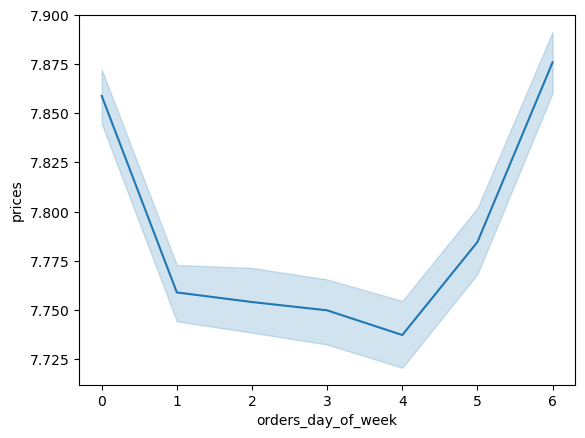

In [26]:
# Create Line Chart for the 30% sample.
line=sns.lineplot(data=df_2, x='orders_day_of_week', y='prices')

In [27]:
# Exporting the line chart.
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_orders_dow.png'))

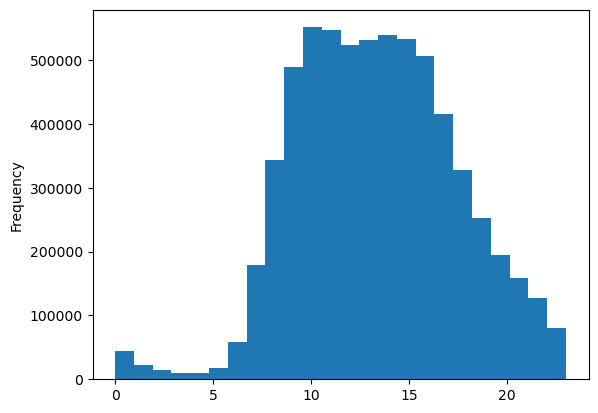

In [28]:
## 03. Create a histogram of the “order_hour_of_day” column.
hist_hour_of_day_ordered = df_ords_prods_all['order_hour_of_day'].plot.hist(bins=24)

In [29]:
# Export the histogram.
hist_hour_of_day_ordered.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_hour_of_day_ordered.png'))

#### The histogram illustrates that the least active periods occur between 1am and 6am. Peak order times typically span from around 9am to 6pm. After 5pm, there is a gradual decrease in orders, with a continued steady decline in each subsequent hour

## 04. Create a bar chart from the “loyalty_flag” column.

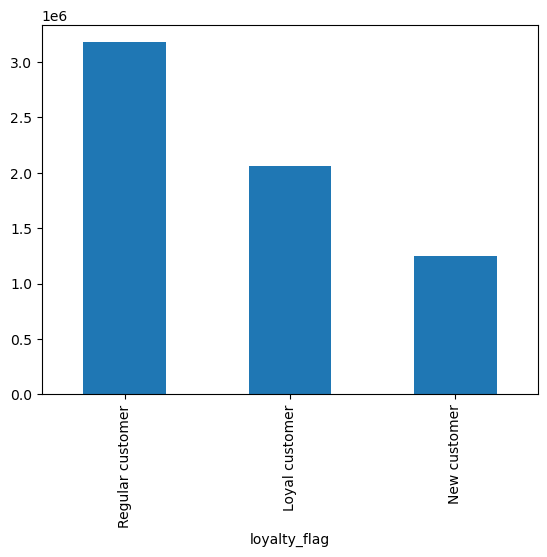

In [30]:
# Create a bar chart from the loyalty_flag column\n",
bar_loyalty_flag = df_ords_prods_all['loyalty_flag'].value_counts().plot.bar()

In [31]:
# Export the barchart.
bar_loyalty_flag.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_flag.png'))

## 05. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day.

In [32]:
# Create the seed
np.random.seed(4)

In [33]:
# Create a list holding True/False values to test the np.random.rand () <= 0.7.
dev = np.random.rand(len(df_ords_prods_all)) <= 0.7

In [34]:
dev

array([False,  True, False, ..., False,  True, False])

In [35]:
np.random.rand(10)

array([0.92344708, 0.56052216, 0.75907322, 0.57148972, 0.30861965,
       0.14168662, 0.48030241, 0.12463101, 0.7821462 , 0.37886826])

In [36]:
# Store 70% of the sample in the dataframe big.
big = df_ords_prods_all[dev]

In [37]:
# Store 30% of the sample in the dataframe small
small = df_ords_prods_all[~dev]

In [38]:
# Checking the accuracy of the samples formed.
len(df_ords_prods_all)

6481475

In [39]:
len(big) + len(small)

6481475

In [41]:
df_3=small[['order_hour_of_day', 'prices']]

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


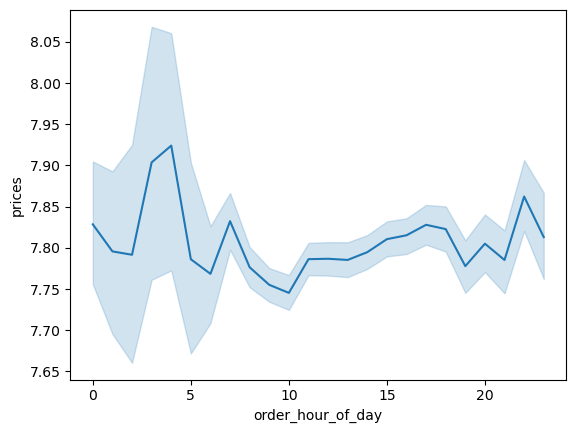

In [42]:
# Create Line Chart for the 30% sample
line_order_hour_of_day=sns.lineplot(data=df_3, x='order_hour_of_day', y='prices')

In [43]:
# Exporting the line chart
line_order_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_order_hour_of_day.png'))

## 06. determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents

In [44]:
#Check if there is a connection between age and number dependants.
#Create the seed.
np.random.seed(4)

In [45]:
 #Create a list holding True/False values to test the np.random.rand () <= 0.7.
dev = np.random.rand(len(df_ords_prods_all)) <= 0.7

In [46]:
dev

array([False,  True, False, ..., False,  True, False])

In [47]:
np.random.rand(10)

array([0.92344708, 0.56052216, 0.75907322, 0.57148972, 0.30861965,
       0.14168662, 0.48030241, 0.12463101, 0.7821462 , 0.37886826])

In [48]:
# Store 70% of the sample in the dataframe big
big = df_ords_prods_all[dev]

In [49]:
# Store 30% of the sample in the dataframe small.
small = df_ords_prods_all[~dev]

In [50]:
# Checking the accuracy
len(df_ords_prods_all)

6481475

In [51]:
len(big) + len(small)

6481475

In [53]:
df_4=small[['dependants', 'Age']]

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


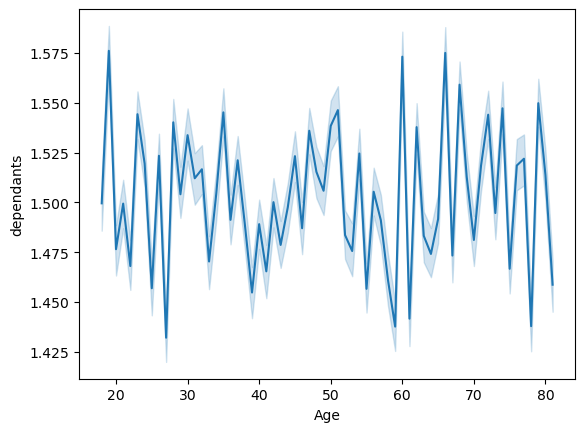

In [54]:
# Create Line Chart for the 30% sample
line_dependants=sns.lineplot(data=df_4, x='Age', y='dependants')

In [56]:
# Exporting the line chart
line_dependants.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_dependants.png'))

#### The line chart does not show a correlation between age and number of dependants

## The line chart does not show a correlation between age and number of dependants

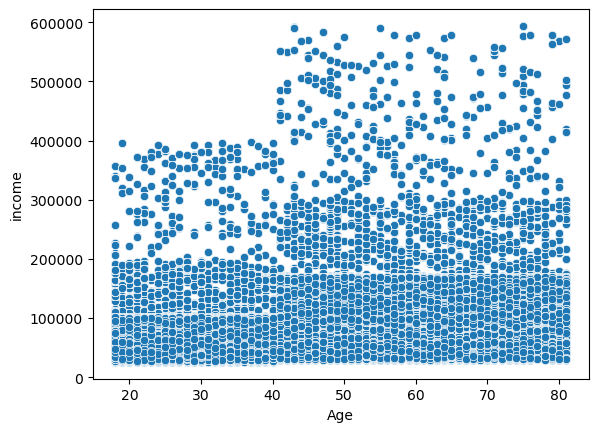

In [57]:
scatterplot_age_income = sns.scatterplot(x = 'Age', y = 'income', data = df_ords_prods_all)

In [58]:
# Exporting the scatterplot.
scatterplot_age_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_age_income.png'))

#### The scatterplot indicates that the most concentrated income range across all age groups falls between $0.00 and $200,000. Following this, the next prominent income bracket spans from $200,000 to $300,000, predominantly observed within the 40+ age group. Moreover, income values ranging from $200,000 to $400,000 are distributed across all age ranges. Lastly, there are scattered income values ranging from $300,000 to $600,000 primarily observed within the 40+ age category.